<a href="https://colab.research.google.com/github/marcos-pd/IA_Prompting_CoderHouse/blob/main/Entrega_Final_CoderHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generación de contenidos de difusión a partir de informes técnicos**
*Marcos Ferrrario*

*La solución que vamos a construir permite cargar un informe en pdf y mediante herramientas y librerías en Python extraer el texto que contiene. Ese texto se guardará en en una variable y se pasará a un modelo LLM para que, mediante un prompt optimizado, el modelo devuelva un texto con engagement que pueda usarse para su difusión mediante RS, email y publicación en web institucional.*


# *EXTRACIÓN DE TEXTO desde PDF*

Para la extracción de PDFs, las bibliotecas más comunes y robustas en Python son PyPDF2 (para PDFs basados en texto) y pdfplumber (que maneja mejor la estructura y tablas, y es más potente).

No es nuestro caso, pero para resolver el problema de pdfs escaneados, hay que usar una herramienta de OCR, donde PyTesseract es una buena opción.

In [5]:
# Instalar bibliotecas necesarias (ejecutar solo una vez por sesión)
!pip install PyPDF2
!pip install pdfplumber
!pip install google-colab

from google.colab import files
import pdfplumber
import re # Para futuras extracciones numéricas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00


In [6]:
# Subir el archivo PDF
print("Por favor, selecciona y sube tu archivo PDF (solo uno):")
uploaded = files.upload()

# Validamos la subida del archivo. Funciona mentras subas un solo archivo.
if uploaded:
    pdf_file_path = list(uploaded.keys())[0]
    print(f"Archivo '{pdf_file_path}' subido exitosamente.")
else:
    pdf_file_path = None
    print("No se ha subido ningún archivo.")

Por favor, selecciona y sube tu archivo PDF (solo uno):


Saving 2025_07. SIOMAA en Foco. Las marcas chinas 2030.pdf to 2025_07. SIOMAA en Foco. Las marcas chinas 2030.pdf
Archivo '2025_07. SIOMAA en Foco. Las marcas chinas 2030.pdf' subido exitosamente.


In [7]:
# Extraemos el texto del PDF
def extract_info_from_pdf_pdfplumber(pdf_path):
    full_text = ""
    extracted_tables = []

    if not pdf_path:
        print("Error: No se proporcionó una ruta de archivo PDF válida.")
        return None, None

    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                # Extraer texto de la página
                page_text = page.extract_text()
                if page_text:
                    full_text += page_text + "\n\n"

                # Extraer tablas de la página
                tables = page.extract_tables()
                if tables:
                    extracted_tables.extend(tables)
    except Exception as e:
        print(f"Error al procesar el PDF '{pdf_path}': {e}")
        return None, None

    return full_text, extracted_tables

In [8]:
# Verificando la extracción
if 'pdf_file_path' in locals() and pdf_file_path:
    print(f"\nIntentando extraer información de: {pdf_file_path}")
    extracted_text_pdfplumber, extracted_tables_pdfplumber = extract_info_from_pdf_pdfplumber(pdf_file_path)

    if extracted_text_pdfplumber is not None:
        print("\n--- Texto extraído con pdfplumber (primeros 1000 caracteres) ---")
        print(extracted_text_pdfplumber[:1000])
        print("\n--- Fin del fragmento de texto ---")

        if len(extracted_text_pdfplumber) > 1000:
            print(f"\n(El texto completo tiene {len(extracted_text_pdfplumber)} caracteres. Se mostraron los primeros 1000.)")

        if extracted_tables_pdfplumber:
            print(f"\n--- Se encontraron {len(extracted_tables_pdfplumber)} tabla(s) ---")
            for i, table in enumerate(extracted_tables_pdfplumber):
                print(f"\nTabla {i+1} (primeras 3 filas):")
                for row_idx, row in enumerate(table):
                    print(row)
                    if row_idx >= 2:
                        break
                if i >= 0: # Para mostrar solo la primera tabla.
                    break
        else:
            print("\n--- No se encontraron tablas con pdfplumber. ---")
    else:
        print("\n--- La extracción de PDF falló o no se pudo obtener texto/tablas. ---")
else:
    print("\nError: La ruta del archivo PDF no está disponible. Asegurate de haber subido el archivo  y de que la variable 'pdf_file_path' se haya creado correctamente.")


Intentando extraer información de: 2025_07. SIOMAA en Foco. Las marcas chinas 2030.pdf



--- Texto extraído con pdfplumber (primeros 1000 caracteres) ---
JULIO 2025
K
C
A
L
B
S
E
T
N
E
I
L
C
SIOMAA en FOCO
El avance de marcas chinas
en Argentina 2025-2030
La creciente presencia de vehículos de origen chino, que en el pasado fue
un fenómeno de nicho, se ha consolidado como una ofensiva estratégica,
calculada y multifacética que está redefiniendo la oferta, los precios y las
expectativas de los consumidores.

JULIO 2025
K
C
A
L
B
S
E
T
N
E
I
L
El mercado automotor argentino se encuentra en medio de una de las C
transformaciones más profundas de su historia. La creciente presencia de
vehículos de origen chino, que en el pasado fue un fenómeno de nicho, se ha
consolidado como una ofensiva estratégica, calculada y multifacética que está
redefiniendo la oferta, los precios y las expectativas de los consumidores. Esta
"avalancha" de modelos no es un suceso aleatorio, sino el resultado de una
decisión deliberada por parte de los gigantes automotrices chinos de conquistar
uno de l

# *PROCESAMIENTO DEL TEXTO EXTRAIDO a través del modelo OpenAI gpt 4o*

In [9]:
from google.colab import userdata
from openai import OpenAI
import json
import requests
from PIL import Image
from io import BytesIO

# Carga la clave de API desde "los secretos" de Colab
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

# Inicializa el cliente de OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

# Prueba una pequeña solicitud para verificar la conexión
try:
    response = client.chat.completions.create(
        model="gpt-4", #"gpt-3.5-turbo"
        messages=[{"role": "user", "content": "Hola, ¿estás funcionando?"}]
    )
    print("Conexión a OpenAI exitosa:", response.choices[0].message.content)
except Exception as e:
    print(f"Error al conectar con OpenAI: {e}")
    print("Asegúrate de que tu clave de API esté configurada correctamente en los secretos de Colab y que tengas saldo disponible.")

Conexión a OpenAI exitosa: ¡Hola! Sí, estoy funcionando. ¿Cómo puedo ayudarte hoy?


Vamos a darle a ChatGPT un prompt usando la técnica de One Shot Prompting para darle contexto y especificarle al modelo que genere un resultado que optimice el uso de recursos y minimice los costos.

Este prompt le pedirá al sistema que genere un texto para publicar y un prompt para que Dall-E genere una imágen ilustrativa para la publicación, por ejemplo, en Linkedin.

Este método nos permite ahorrar costos ya que realizamos una sola llamada a la API en lugar de dos y aumentar la coherencia, ya que el mmismo modelo que entendió y resumió el texto es el que sugiere la imagen, asegurando que el concepto visual esté perfectamente alineado con el textual.

El prompt le pedirá a la API que genere un JSON con dos claves: una para el texto y otra para el prompt de la imagen.

Luego usará esas dos salidas para generar un archivo .txt con los textos para la publicación, que se va a guardar en una carpeta en Google Drive y llamará a Dall-E para generar la imágen a partir de la segunda parte de la salida.


🤖 Enviando solicitud a OpenAI con el modelo gpt-4o. Esto puede tomar unos segundos...

--- ✅ Contenido para LinkedIn generado ---
🚗🌍 En el dinámico mundo del mercado automotor argentino, las marcas chinas están redefiniendo las reglas del juego. Lo que comenzó como una curiosidad de nicho se ha transformado en una ofensiva estratégica que está sacudiendo la industria. Desde la llegada de BYD con su enfoque directo y disruptivo, hasta la diversificación de GWM bajo el paraguas del Grupo Car One, el panorama automotor está experimentando una revolución. 

La clave del éxito radica en la capacidad de estos gigantes para ofrecer vehículos que no solo compiten en precio, sino que también destacan en tecnología, diseño y seguridad. Con una creciente oferta de SUVs y vehículos eléctricos, las marcas chinas están obligando a los jugadores tradicionales a replantear sus estrategias. 

Además, el papel de los importadores locales es crucial. Grupos como Car One y Corven están liderando esta tra

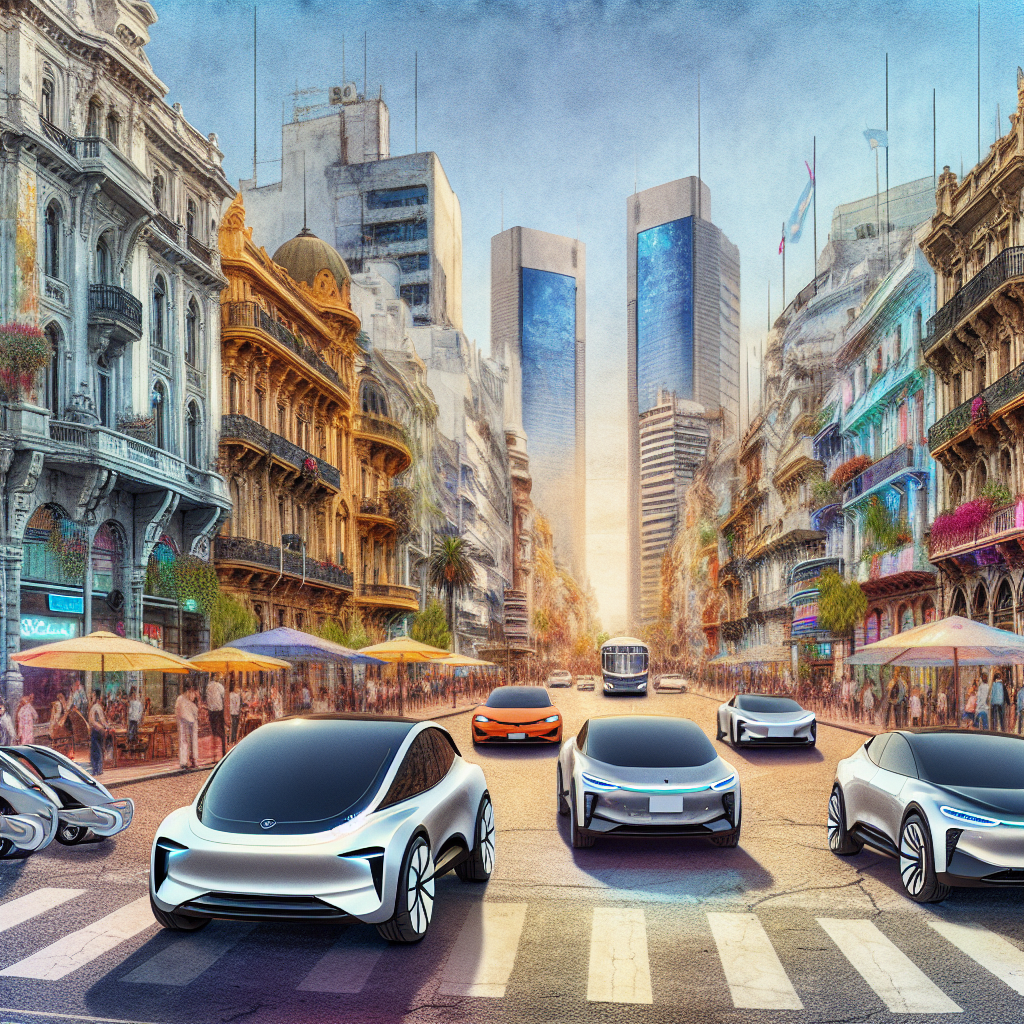

In [12]:
if 'extracted_text_pdfplumber' in locals() and extracted_text_pdfplumber:
    prompt_messages = [
        {"role": "system", "content": "Eres economista con muy buen conocimento de la macroeconomía argentina y un fuerte expertice en el mercado automotor. Tu diferencial como analista es tu capacidad para entender las implicancias de las novedades macroeconómicas en el negocio automotriz, desde la industria (fábricas, autopartistas o importadores) hasta el retail minorista (la venta de vehículos nuevos y usados al consumidor final). En tu rol, tienes el objetivo de analizar los informes técnicos que se te proveeran y a partir de ellos generar contenido para los canales de difusión de la empresa que los promueve. Ese contenido está orientado a Redes Sociales como Linkedin y a textos con engadgement para difundir los informes por email o en el sitio web de la empresa. Para generar esos contenidos, es importante que mantengas ciertas cualidades del lenguaje humano a través de las siguientes premisas: 1) Manteniendo la estructura general del texto y el rigor técnico, agregando emociones sutiles, expresiones humanas y lenguaje conversacional. 2) Redactar el texto con frases de ritmo variado, mezclando oraciones cortas con oraciones largas. 3) Sustituye palabras genéricas por otras más específicas que contengan carga emocional. 4) Agrega conectores suaves y naturales como “además”, “y es que”, etc. En la medida de lo posible usa ejemplos, analogías o detalles que hagan más cercano el texto al lector. 5) Evita estructuras gramaticales repetitivas, frases simétricas o lenguaje neutro. Finalmente, estructura tu respuesta únicamente como un objeto JSON válido con las siguientes dos claves: 'texto_linkedin' (que contendrá el texto generado para la publicación) y 'prompt_imagen' (que contendrá un prompt descriptivo en inglés, de no más de 100 palabras, para que un generador de imágenes como DALL-E cree una ilustración fotorrealista y profesional que acompañe al texto)."},
        {"role": "user", "content": f"Analiza el siguiente informe técnico y genera el contenido JSON solicitado:\n\n---\nINFORME TÉCNICO:\n{extracted_text_pdfplumber}\n---"}
    ]

    model_name = "gpt-4o" # gpt-4o es ideal para esta tarea por su calidad y capacidad para seguir instrucciones JSON
    print(f"\n🤖 Enviando solicitud a OpenAI con el modelo {model_name}. Esto puede tomar unos segundos...")

    try:
        # LLAMADA A GPT-4o Y PROCESAMIENTO JSON
        response_gpt = client.chat.completions.create(
            model=model_name,
            messages=prompt_messages,
            temperature=0.5,
            response_format={"type": "json_object"} # Forzamos una respuesta JSON para mayor fiabilidad
        )

        # Parseamos la respuesta JSON
        raw_content = response_gpt.choices[0].message.content
        resultados_json = json.loads(raw_content)

        texto_para_linkedin = resultados_json.get("texto_linkedin", "Error: No se encontró el texto para LinkedIn en la respuesta.")
        prompt_para_dalle = resultados_json.get("prompt_imagen", "A photorealistic image of the Argentinian automotive market, focusing on new cars in a dealership.")

        print("\n--- ✅ Contenido para LinkedIn generado ---")
        print(texto_para_linkedin)
        print("\n--- ✅ Prompt para DALL-E generado ---")
        print(prompt_para_dalle)

        # GUARDAR EL TEXTO EN GOOGLE DRIVE
        from google.colab import drive
        drive.mount('/content/drive', force_remount=True)
        ruta_texto = '/content/drive/MyDrive/post_linkedin.txt'

        with open(ruta_texto, 'w', encoding='utf-8') as f:
            f.write(texto_para_linkedin)
        print(f"\n📝 Texto guardado exitosamente en Google Drive: {ruta_texto}")

        # GENERAMOS LA IMAGEN CON DALL-E 3
        print("\n🎨 Generando imagen con DALL-E 3. Esto puede tardar un momento...")
        response_dalle = client.images.generate(
            model="dall-e-3",
            prompt=prompt_para_dalle,
            size="1024x1024",
            quality="standard",
            n=1,
        )
        image_url = response_dalle.data[0].url

        # GUARDAR Y MOSTRAR LA IMAGEN
        ruta_imagen = '/content/drive/MyDrive/imagen_linkedin.png'
        response_img = requests.get(image_url)
        img = Image.open(BytesIO(response_img.content))

        img.save(ruta_imagen)
        print(f"🖼️ Imagen guardada exitosamente en Google Drive: {ruta_imagen}")

        print("\n--- Mostrando imagen generada ---")
        display(img)

    except json.JSONDecodeError:
        print("\n❌ Error Crítico: La respuesta de OpenAI no fue un JSON válido. No se puede continuar.")
        print("Respuesta recibida:", raw_content)
    except Exception as e:
        print(f"\n❌ Ocurrió un error durante la generación o guardado: {e}")

else:
    print("\n--- Proceso detenido: No se pudo extraer texto del PDF para generar el prompt. ---")